In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
def get_metrics(path):
    ppl, sacrebleu, rouge_lemma, x = [], [], [], []
    was = 0
    with open(path, 'r') as f:
        while 1:
            s = f.readline()
            if s == '':
                break
            d = json.loads(s)
            if "valid" in d.keys():
                if 'train_examples_seen' in d['valid'].keys():
                    if was:
                        ppl.append(d['valid']['metrics']['ppl'])
                        sacrebleu.append(d['valid']['metrics']['sacrebleu'])
                        rouge_lemma.append(d['valid']['metrics']['rouge1_lemma'])
                        x.append(d['valid']['train_examples_seen'])
                    was = 1
    
    return x, ppl, sacrebleu, rouge_lemma

In [25]:
def plot_all(paths, names):
    ppls = []
    sacrebleus = []
    rouge_lemmas = []
    xx = []
    for path in paths:
        T = get_metrics(path)
        xx.append(T[0])
        ppls.append(T[1])
        sacrebleus.append(T[2])
        rouge_lemmas.append(T[3])

    plt.figure(figsize=(8, 5))
    for name, ppl, x in zip(names, ppls, xx):
        plt.plot(x, ppl, label=name)
#     plt.title('ppl') 
    plt.xlabel('Размер обучающей выборки')
    plt.ylim((1, 2))
    plt.legend()
    plt.savefig('experiment ppl.svg')
    plt.show()
    
    plt.figure(figsize=(10, 8))
    for name, sacrebleu, x in zip(names, sacrebleus, xx):
        plt.plot(x, sacrebleu, label=name)
#     plt.title('sacrebleu') 
    plt.xlabel('Размер обучающей выборки')
    plt.ylim((5, 20))
    plt.legend()
    plt.savefig('experiment bleu.svg')
    plt.show()
    
    plt.figure(figsize=(10, 8))
    for name, rouge_lemma, x in zip(names, rouge_lemmas, xx):
        plt.plot(x, rouge_lemma, label=name)
#     plt.title('rouge1_lemma')
    plt.xlabel('Размер обучающей выборки')
    plt.ylim((0.5, 0.8))
    plt.legend()
    plt.savefig('experiment rouge1.svg')
    plt.show()
    

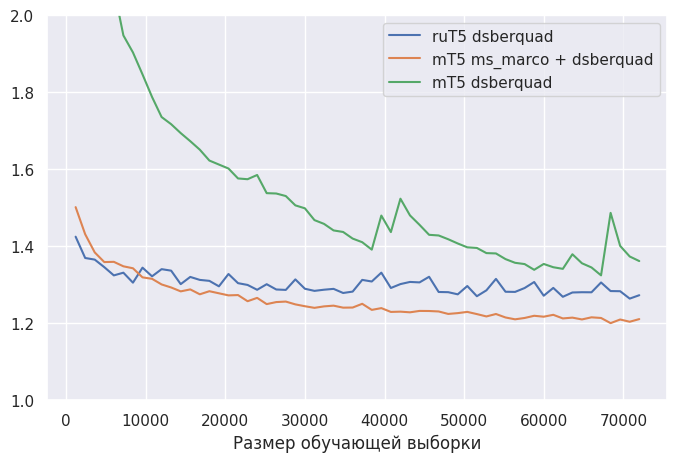

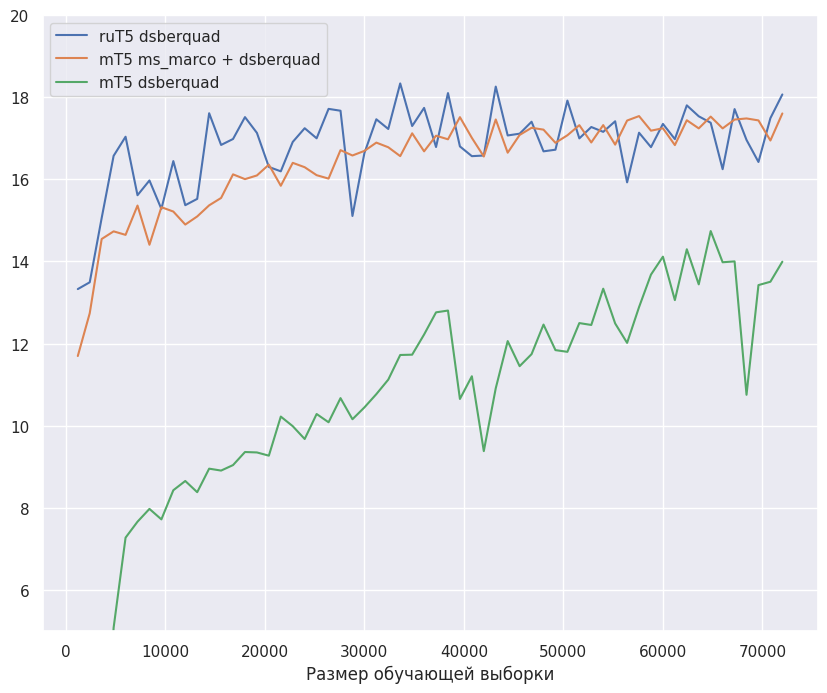

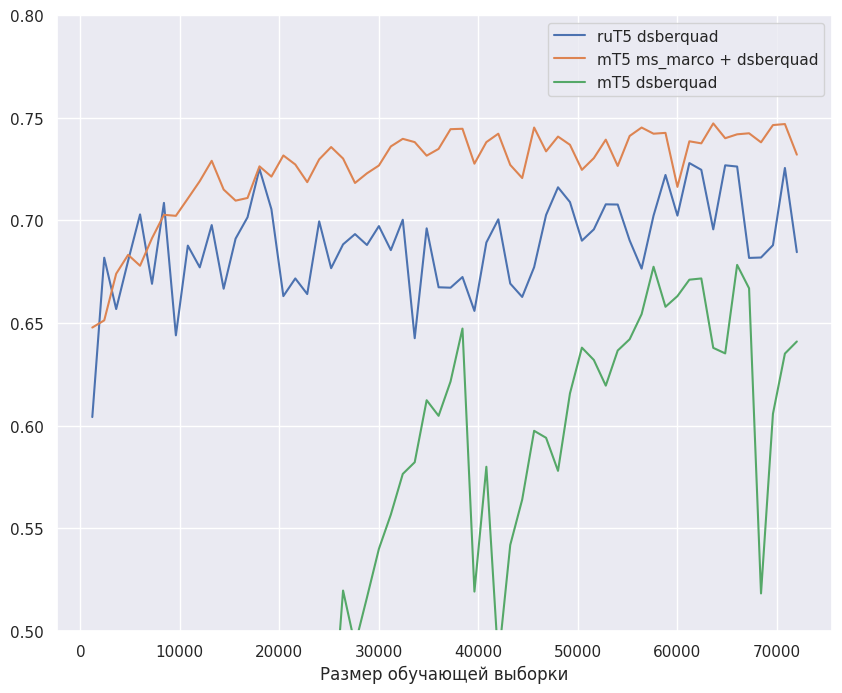

In [26]:
plot_all(['../training/ruT5_dsberquad/logs/log1.txt',
         '../training/mt5_ms_marco_dsberquad/logs/log1.txt',
         '../training/mt5_dsberquad/logs/log1.txt',], ['ruT5 dsberquad', 'mT5 ms_marco + dsberquad', 'mT5 dsberquad'])

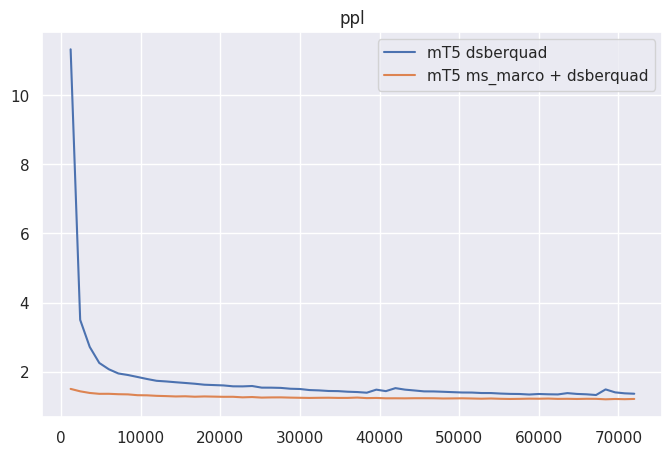

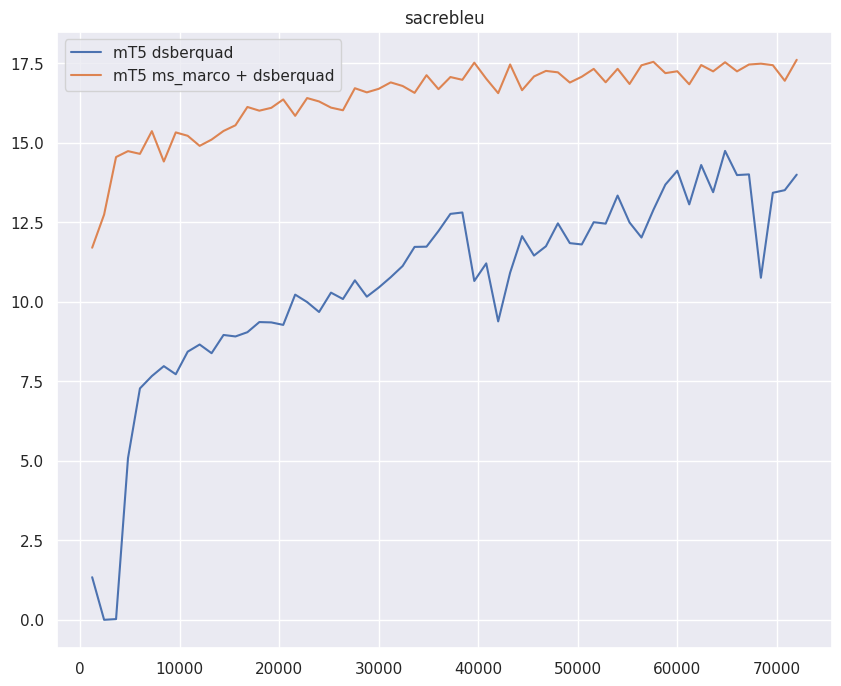

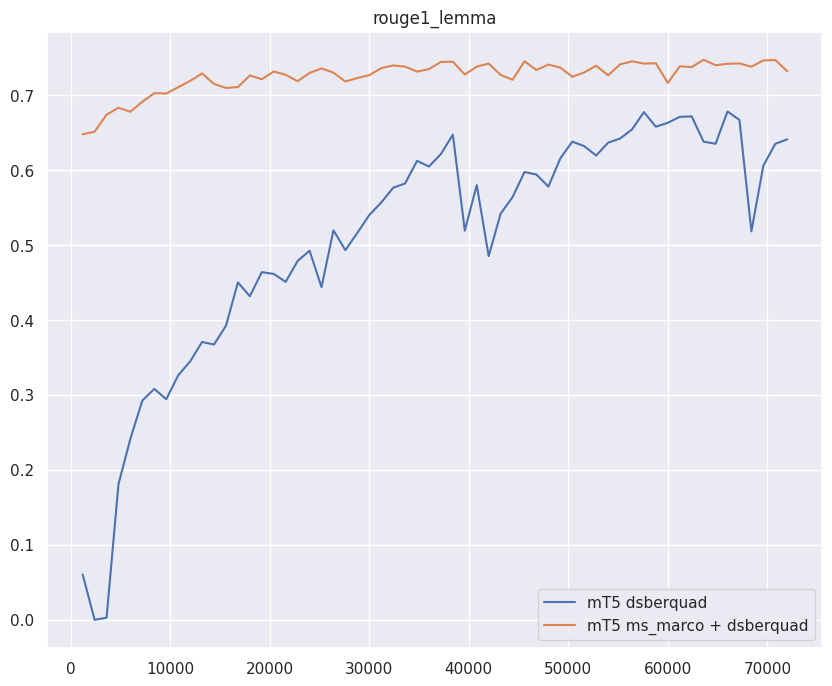

In [22]:
plot_all(['../training/mt5_dsberquad/logs/log1.txt',
         '../training/mt5_ms_marco_dsberquad/logs/log1.txt'], ['mT5 dsberquad', 'mT5 ms_marco + dsberquad'])

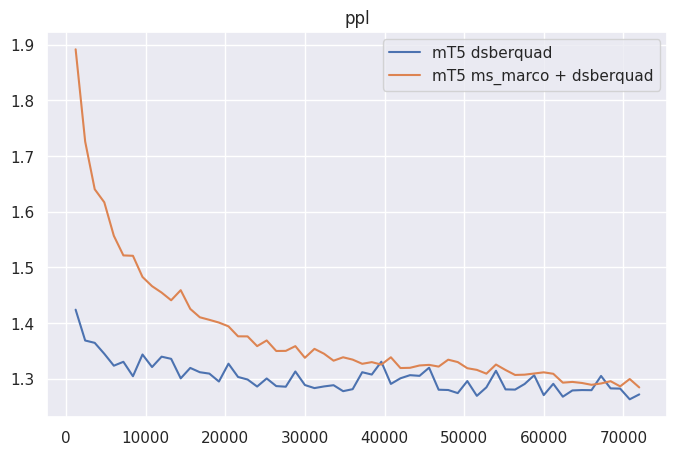

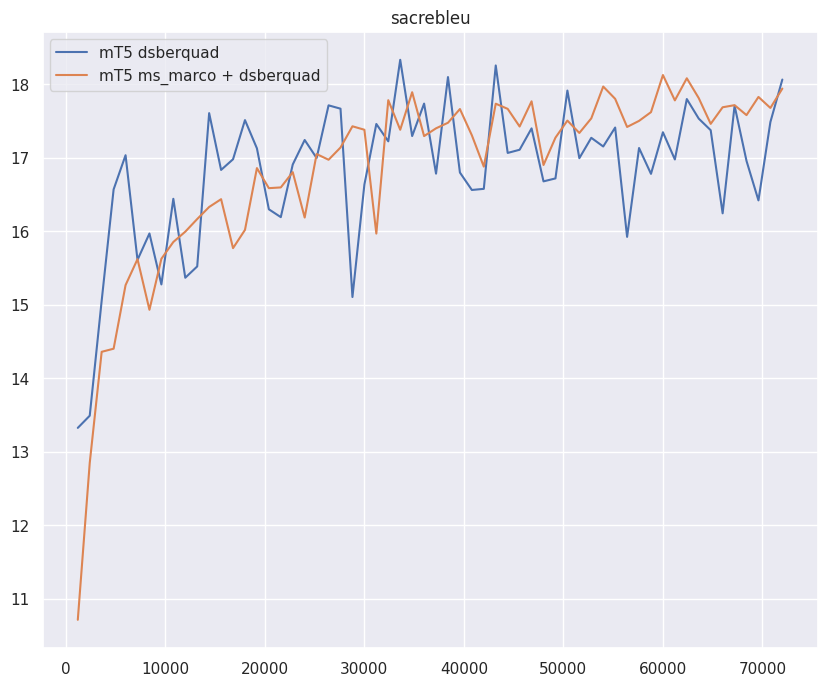

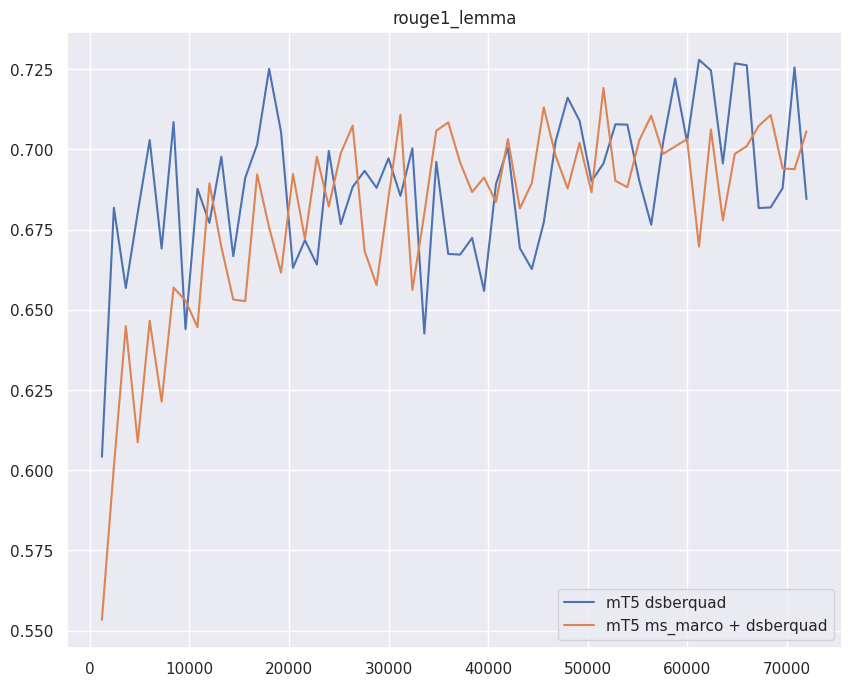

In [17]:
plot_all(['../training/ruT5_dsberquad/logs/log1.txt',
         '../training/ruT5_ms_marco_dsberquad/logs/log1.txt'], ['mT5 dsberquad', 'mT5 ms_marco + dsberquad'])